In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fig_path = "C:\\Users\\mwaugh\\github\\perla_tonetti_waugh\\Figures"
# Change this to reflect where the local repository is...

This reads in the data from the `julia` code. There should be two csv files, one of the transtion path, another for the stuff in the initial stationary eq.

In [52]:
df = pd.read_csv("transition_results.csv")
df_stationary = pd.read_csv("stationary_results.csv")
df_welfare = pd.read_csv("welfare_results.csv")

In [6]:
df.head(10)

,t,g,λ_ii,c,L_tilde,Ω,π_rat,L_tilde_a,L_tilde_x,L_tilde_E
0,0.0,0.020957,0.865238,0.834798,0.273984,0.674027,2.109768,0.082933,0.027924,0.163127
1,0.5,0.021056,0.864949,0.833986,0.274052,0.672587,2.110894,0.083084,0.027983,0.162985
2,1.0,0.021126,0.864648,0.833288,0.274035,0.671170,2.112055,0.083141,0.028046,0.162848
3,1.5,0.021190,0.864348,0.832616,0.274008,0.669775,2.113218,0.083182,0.028111,0.162715
4,2.0,0.021268,0.864074,0.831897,0.274020,0.668402,2.114275,0.083269,0.028166,0.162586
5,2.5,0.021359,0.863817,0.831134,0.274076,0.667052,2.115269,0.083399,0.028214,0.162462
6,3.0,0.021482,0.863570,0.830251,0.274243,0.665723,2.116244,0.083641,0.028259,0.162343
7,3.5,0.021618,0.863335,0.829331,0.274448,0.664417,2.117175,0.083920,0.028300,0.162228
8,4.0,0.021749,0.863094,0.828431,0.274650,0.663132,2.118134,0.084188,0.028344,0.162118
9,4.5,0.021870,0.862859,0.827573,0.274823,0.661868,2.119066,0.084425,0.028386,0.162012


In [153]:
#df = df[["t", "g", "λ_ii", "c", "L_tilde", "Ω", "L_tilde_a", "L_tilde_x", "L_tilde_E"]]

#df.g = df.g - 0.0003

#df.tail(10)

,t,g,λ_ii,c,L_tilde,Ω,L_tilde_a,L_tilde_x,L_tilde_E
141,74.744,0.020009,0.896469,0.812898,0.280134,0.672949,0.080648,0.021272,0.178214
142,74.872,0.020009,0.896469,0.812898,0.280134,0.672949,0.080648,0.021272,0.178214
143,74.936,0.020009,0.896469,0.812898,0.280134,0.672949,0.080648,0.021272,0.178214
144,74.968,0.020009,0.896469,0.812898,0.280134,0.672949,0.080648,0.021272,0.178214
145,74.984,0.020009,0.896469,0.812898,0.280134,0.672949,0.080648,0.021272,0.178214
146,74.992,0.020009,0.896469,0.812898,0.280134,0.672949,0.080648,0.021272,0.178214
147,74.996,0.020009,0.896469,0.812898,0.280134,0.672949,0.080648,0.021272,0.178214
148,74.998,0.020009,0.896469,0.812898,0.280133,0.672949,0.080648,0.021272,0.178214
149,74.999,0.020009,0.896469,0.812898,0.280133,0.672949,0.080648,0.021272,0.178214
150,75.000,0.020009,0.896469,0.812898,0.280134,0.672949,0.080648,0.021272,0.178214


Now we need to do a bit of pandas jujitsu to add the stationary part to the transition path...first replicate the one row data frame, create a new time period, replace the old time

In [8]:
extra_periods = 5;

df_stationary = pd.concat([df_stationary]*extra_periods, ignore_index=True)

In [9]:
df_stationary["t_hat"] = [-20, -15, -10, -5, -1]  

In [10]:
df_stationary.drop(["t"],axis = 1, inplace = True)

In [11]:
df_stationary.rename(columns={"t_hat": "t"},inplace = True)

In [12]:
df_stationary

,g,λ_ii,c,L_tilde,Ω,π_rat,L_tilde_a,L_tilde_x,L_tilde_E,t
0,0.020016,0.896562,0.814131,0.279568,0.674027,1.725055,0.079799,0.02127,0.178499,-20
1,0.020016,0.896562,0.814131,0.279568,0.674027,1.725055,0.079799,0.02127,0.178499,-15
2,0.020016,0.896562,0.814131,0.279568,0.674027,1.725055,0.079799,0.02127,0.178499,-10
3,0.020016,0.896562,0.814131,0.279568,0.674027,1.725055,0.079799,0.02127,0.178499,-5
4,0.020016,0.896562,0.814131,0.279568,0.674027,1.725055,0.079799,0.02127,0.178499,-1


Then append this to the transition path.

In [13]:
df = df.append(df_stationary, ignore_index=True, sort=True)


In [14]:
df = df.sort_values(by=['t'])

df.reset_index(inplace = True)

df.drop(["index"], axis=1, inplace = True)

In [63]:
df.tail(10)

,t,g,λ_ii,c,L_tilde,Ω,π_rat,L_tilde_a,L_tilde_x,L_tilde_E
141,74.744,0.022831,0.859415,0.806399,0.282555,0.639005,2.133334,0.084543,0.028788,0.169224
142,74.872,0.022831,0.859415,0.806400,0.282555,0.639005,2.133335,0.084543,0.028788,0.169224
143,74.936,0.022831,0.859415,0.806400,0.282555,0.639005,2.133335,0.084543,0.028788,0.169224
144,74.968,0.022831,0.859415,0.806400,0.282555,0.639005,2.133335,0.084543,0.028788,0.169224
145,74.984,0.022831,0.859415,0.806400,0.282555,0.639005,2.133335,0.084542,0.028788,0.169224
146,74.992,0.022831,0.859415,0.806400,0.282555,0.639005,2.133335,0.084542,0.028788,0.169224
147,74.996,0.022831,0.859415,0.806400,0.282555,0.639005,2.133336,0.084542,0.028788,0.169224
148,74.998,0.022832,0.859416,0.806398,0.282556,0.639005,2.133334,0.084544,0.028788,0.169224
149,74.999,0.022832,0.859416,0.806398,0.282556,0.639005,2.133334,0.084544,0.028788,0.169224
150,75.000,0.022831,0.859416,0.806399,0.282555,0.639005,2.133331,0.084543,0.028788,0.169224


# Welfare Gains from Trade

In [53]:
df_welfare.head()

,steady_state,transition_path
0,12.279093,13.661642


This reports the welfare gains. One to the left is the steady state, the one to the right is the transition path. Unlike our previous (wrong) stuff, the amplification is much more modest. Not hugly different.

In [79]:
ACR_gains = 100*(((df.λ_ii.iloc[-1])/(df.λ_ii.iloc[0]))**(-1 / 3) - 1)

print("ACR Gains", ACR_gains)

ACR Gains 0.22530426894948885


This reports the ACR implied gains. Need to verify the fomula, but I think this is correct. 0.2 percent increace in welfare. Our model is saying a 14 percentage point increase in welfare. One thing to think about is our consumption response strictly dwarfs just the ACR number. Then there is the growth effect. 

# Plotting the Results

### Growth Rate of Productivity

It's below, and we changed the excercise so we start from the calibrated value and then lower the trade cost by 10 percent.

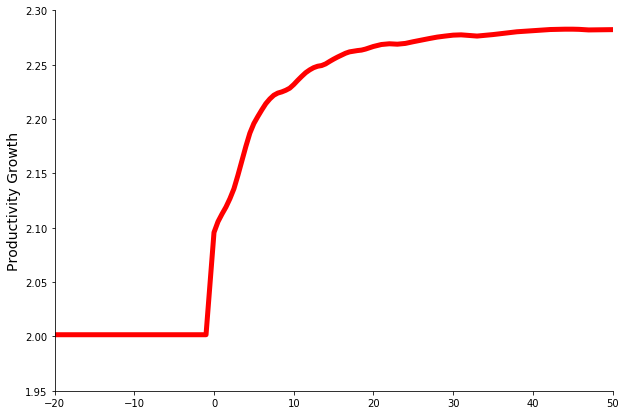

In [44]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(df.t, 100*df.g, color = "red", lw = 5,
        label = "Growth Rate", ls = "-")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Productivity Growth", fontsize = 14) 
ax.set_xlim(-20,50)
ax.set_ylim(1.95,2.30)

plt.savefig(fig_path + "\\growth.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

### The Volume of Trade

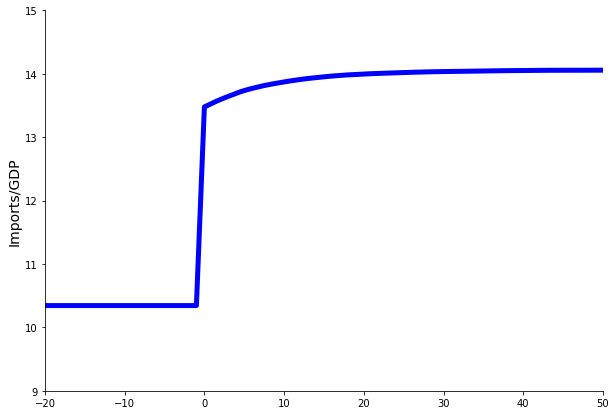

In [22]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(df.t, 100*(1-df.λ_ii), color = "blue", lw = 5,
        label = "Growth Rate", ls = "-")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Imports/GDP", fontsize = 14) 
ax.set_xlim(-20,50)
ax.set_ylim(9,15)

plt.savefig(fig_path + "\\trade.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

### The Pi Ratio

This is not as interesitng as I thought. So it jumps, this explains the jump in growth. But very little dynamics after this.

**Thought** It may be about the cost of adoption. In the SS logic, the cost is stationary, so never comes into play. Not the cost is chaning as varieties exit, Is there a way to do a "net benefit" vs "net costs" calculation.

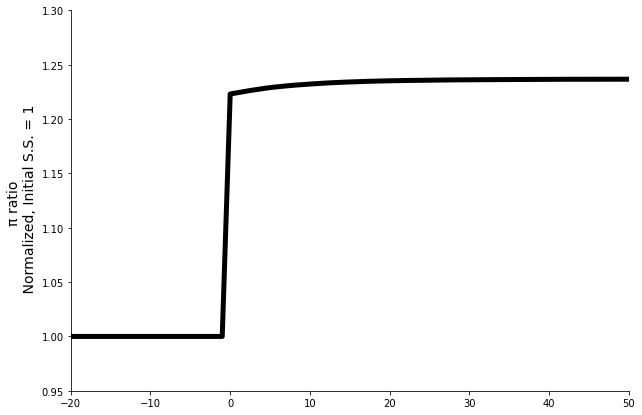

In [50]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(df.t, df.π_rat/df.π_rat.iloc[0], color = "black", lw = 5,
        label = "Growth Rate", ls = "-")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylim(0.95,1.30)
ax.set_xlim(-20,50)

ax.set_ylabel("π ratio \n Normalized, Initial S.S. = 1", fontsize = 14) 

plt.savefig(fig_path + "\\pi_ratio.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

### Consumption

This stuff is very clear, really striking

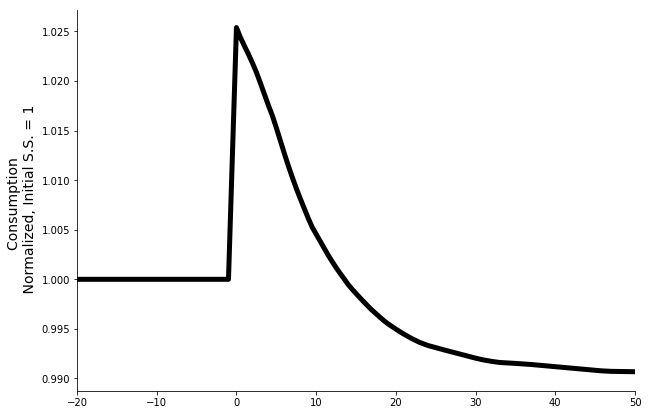

In [46]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(df.t, df.c/df.c.iloc[0], color = "black", lw = 5,
        label = "Growth Rate", ls = "-")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Consumption \n Normalized, Initial S.S. = 1", fontsize = 14) 

#ax.set_ylim(0.98,1.04)

ax.set_xlim(-20,50)

plt.savefig(fig_path + "\\consumption.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

### Domestic Variety

This falls

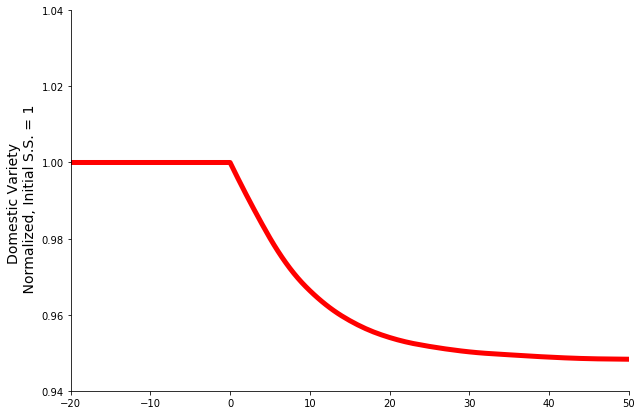

In [51]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(df.t, df.Ω/df.Ω.iloc[0], color = "red", lw = 5,
        label = "", ls = "-")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Domestic Variety \n Normalized, Initial S.S. = 1", fontsize = 14) 

ax.set_ylim(0.94,1.04)

ax.set_xlim(-20,50)

plt.savefig(fig_path + "\\omega.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

### Reallocation effects

So this shows the total amount of labor used  for fixed costs and then breaks it down. So Adoption and Exporting go up, this is the first line. This is a force to lower consumption. However, entry falls, this is the blue line. The drop in labor going to entry is far larger than the increase initially. So, in total, a bunch of labor is allocated towards consumption amplifying the gains from trade.

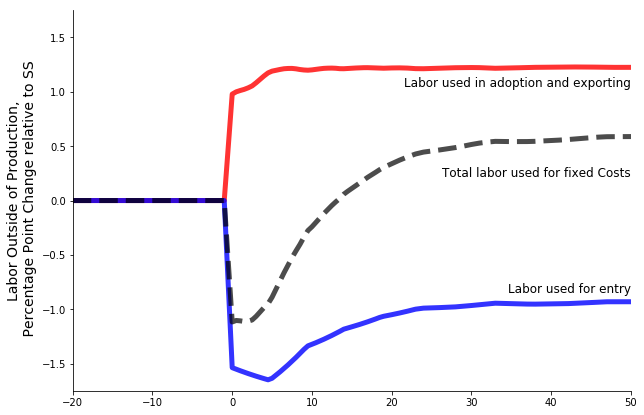

In [26]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(df.t, 100*((df.L_tilde_x + df.L_tilde_a) - (df.L_tilde_a.iloc[0] + df.L_tilde_x.iloc[0])), color = "red", lw = 5, ls = "-", alpha = 0.80)

ax.plot(df.t, 100*(df.L_tilde_E - df.L_tilde_E.iloc[0]) , color = "blue", lw = 5, ls = "-", alpha = 0.80)

ax.plot(df.t, 200*(df.L_tilde - df.L_tilde.iloc[0]), color = "black", lw = 5, ls = "--", alpha = 0.70)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Labor Outside of Production,\n Percentage Point Change relative to SS", fontsize = 14) 

ax.set_xlim(-20,50)
ax.set_ylim(-1.75,1.75)

ax.text(50, 1.05, "Labor used in adoption and exporting", horizontalalignment='right', fontsize = 12) 

ax.text(50, 0.22, "Total labor used for fixed Costs", horizontalalignment='right', fontsize = 12) 

ax.text(50, -0.85, "Labor used for entry", horizontalalignment='right', fontsize = 12) 

plt.savefig(fig_path + "\\fixed_costs.pdf", bbox_inches = "tight", dip = 3600)

plt.show()